epoch 20, x1: -0.010599, x2: 0.000000


d:\Anaconda3\envs\d2l\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


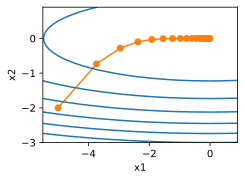

In [1]:
import math, torch
from d2l import torch as d2l

def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta * g1 / math.sqrt(s1 + eps)
    x2 -= eta * g2 / math.sqrt(s2 + eps)
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [2]:
def init_rmsprop_states(features_dim):
    s_w = torch.zeros((features_dim, 1))
    s_b = torch.zeros((1, ))
    return s_w, s_b

def rmsprop(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] = hyperparams['gamma'] * s + (1 - hyperparams['gamma']) * torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.248, 0.012 sec/epoch


([0.014066696166992188,
  0.02506089210510254,
  0.03685903549194336,
  0.048862457275390625,
  0.0608677864074707,
  0.07285904884338379,
  0.08385086059570312,
  0.09485220909118652,
  0.10585904121398926,
  0.11686468124389648,
  0.12885737419128418,
  0.14084887504577637,
  0.1518397331237793,
  0.1638329029083252,
  0.17684102058410645],
 [0.3512135592699051,
  0.30007959858576455,
  0.2648619505961736,
  0.25111009975274406,
  0.24849703266223272,
  0.24629450233777364,
  0.24805455223719278,
  0.24786797694365184,
  0.24283329699436823,
  0.24281699766715367,
  0.24333811543385186,
  0.24643220031261445,
  0.24257660218079885,
  0.24228733352820078,
  0.24784472131729127])

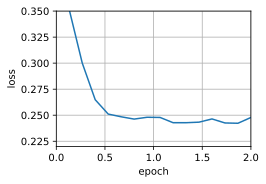

In [3]:
data_iter, features_dim = d2l.get_data_ch11(10)
d2l.train_ch11(rmsprop, init_rmsprop_states(features_dim), {'gamma': .9, 'lr': .01}, data_iter, features_dim)

loss: 0.248, 0.011 sec/epoch


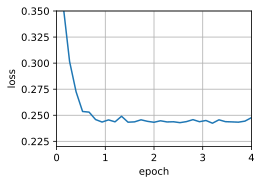

In [6]:
trainer = torch.optim.RMSprop
d2l.train_concise_ch11(trainer, {'lr': .01, 'alpha': .9}, data_iter)